<a href="https://colab.research.google.com/github/karansingla11223344/LoanTap-Business-Case/blob/main/jamboree_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamboree Education business case







Jamboree Education helps students secure admissions to universities in foreign countries by providing personalized guidance and academic counseling. One of the key challenges is estimating a student’s probability of admission based on their academic profile.

In this business case, we build a Linear Regression model to predict the chance of admission using features such as GRE score, TOEFL score, university rating, SOP, LOR, CGPA, and research experience. The objective is to support data-driven counseling decisions and improve admission outcome predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 46.5MB/s]


In [ ]:
data=pd.read_csv('Jamboree_Admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.drop(columns='Serial No.',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

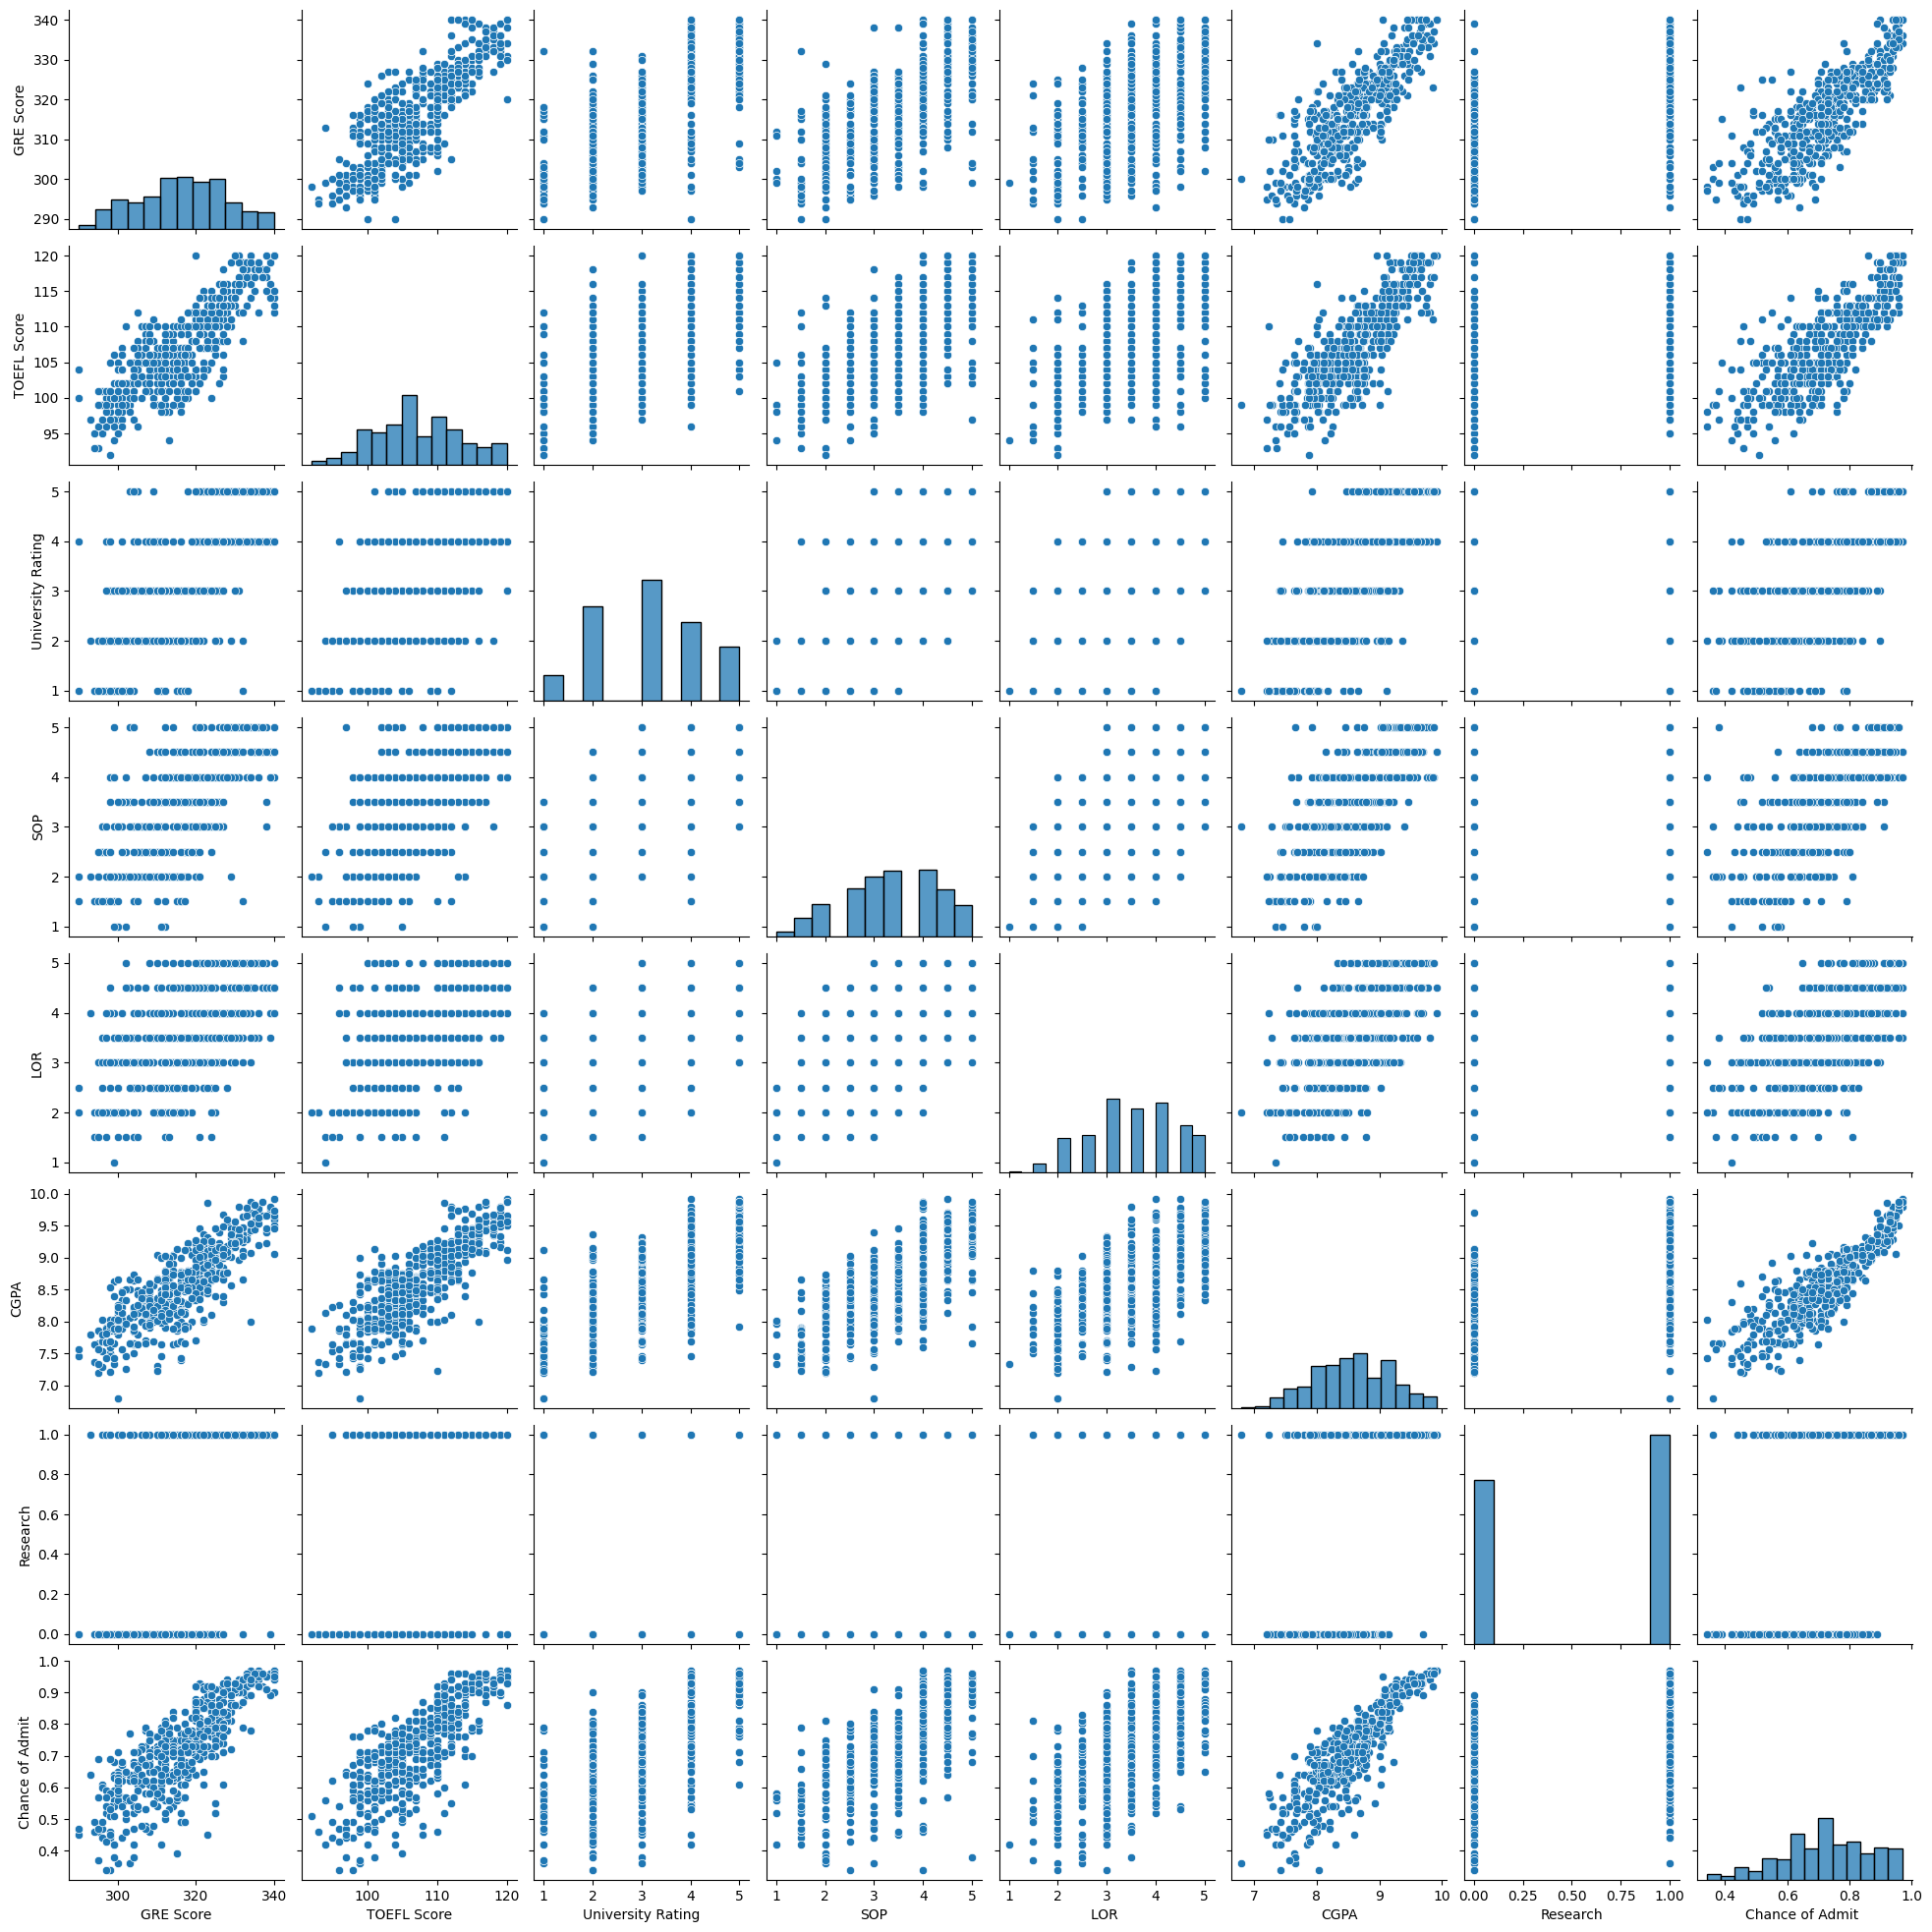

In [ ]:
sns.pairplot(data=data)

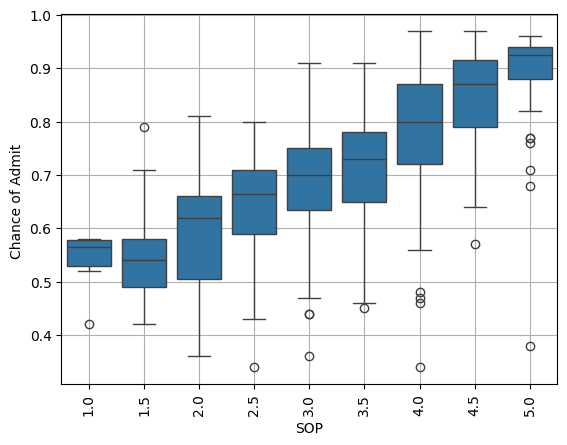

In [ ]:
sns.boxplot(x='SOP',y='Chance of Admit ',data=data)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

observation

we can see when sop(Statement of Purpose and Letter of Recommendation Strength) is 5 there are so many outliers it is due to no.of students do research is zero

In [ ]:
from statsmodels.graphics.gofplots import qqplot

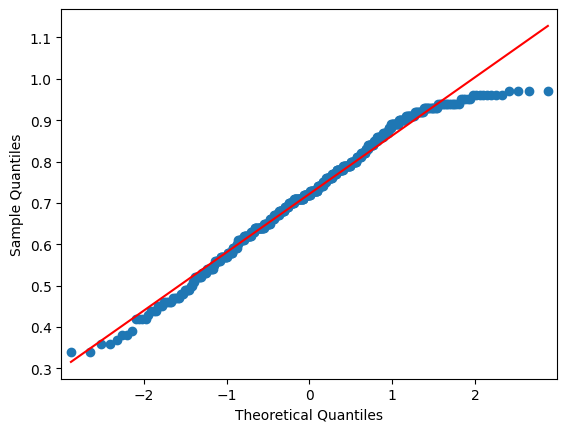

In [ ]:
qqplot(data['Chance of Admit '],line='s')
plt.show()

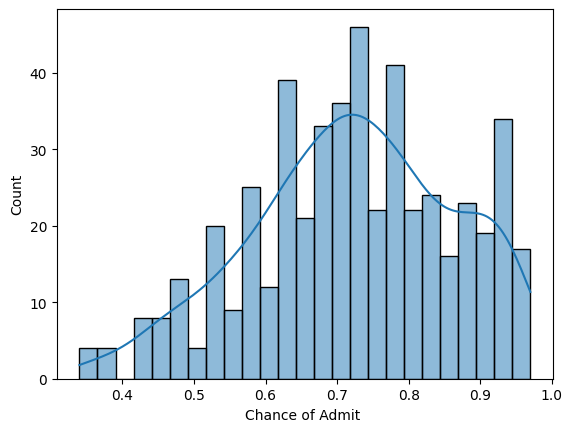

In [ ]:
sns.histplot(x='Chance of Admit ',data=data,kde=True,bins=25)
plt.show()

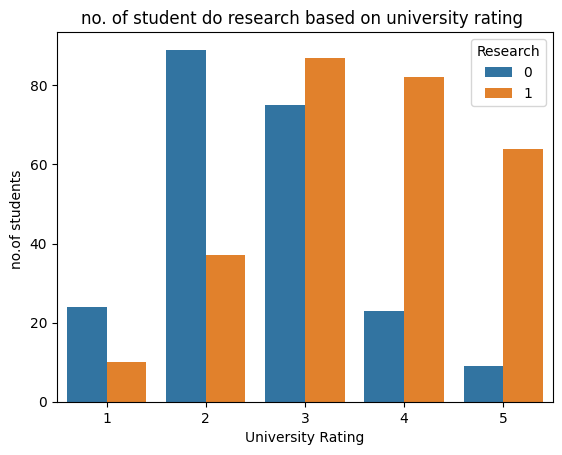

In [ ]:
sns.countplot(x='University Rating',hue='Research',data=data)
plt.xlabel('University Rating')
plt.ylabel('no.of students ')

plt.title('no. of student do research based on university rating ')
plt.show()

Observation

there is high chance that in high rating university  students do research  more than low rating university beacuse there is high chance they provide good platform for research or may be university give past research papers to aspire students for sesearch

In [ ]:
from scipy.stats import shapiro

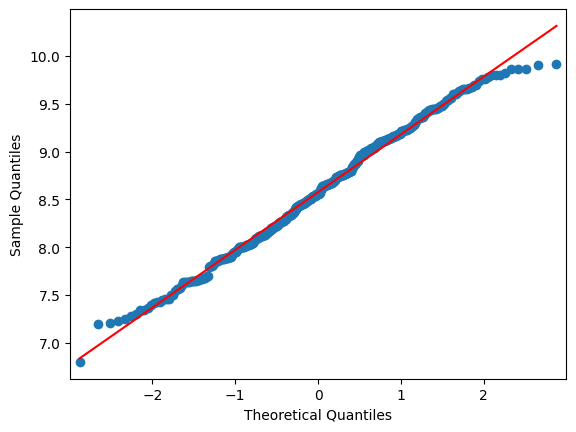

In [ ]:
qqplot(data['CGPA'],line='s')
plt.show()

In [ ]:
shapiro(data['GRE Score'])

ShapiroResult(statistic=np.float64(0.9857423277772411), pvalue=np.float64(8.202210016135558e-05))

In [ ]:
shapiro(data['TOEFL Score'])

ShapiroResult(statistic=np.float64(0.9858326279517755), pvalue=np.float64(8.718714564805742e-05))

In [ ]:
shapiro(data['Chance of Admit '])

ShapiroResult(statistic=np.float64(0.9802486715655624), pvalue=np.float64(2.6536514501898675e-06))

<Axes: xlabel='CGPA', ylabel='Count'>

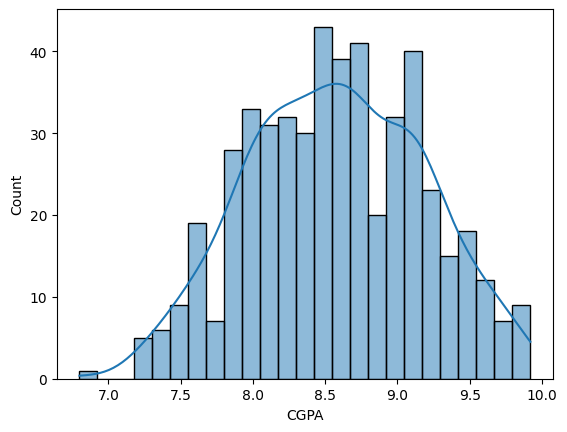

In [ ]:
sns.histplot(x='CGPA',data=data,kde=True,bins=25)

<Axes: xlabel='Research', ylabel='Chance of Admit '>

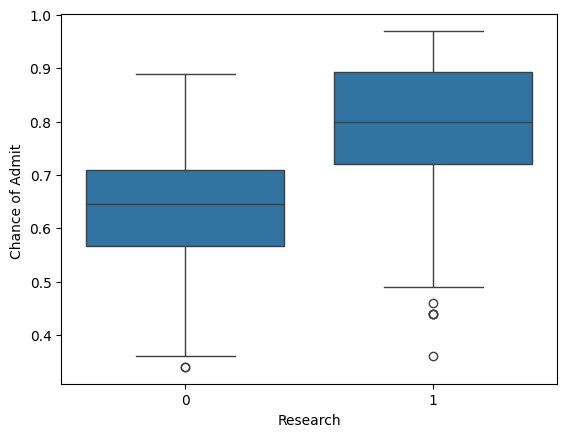

In [ ]:
sns.boxplot(y='Chance of Admit ',x='Research',data=data)

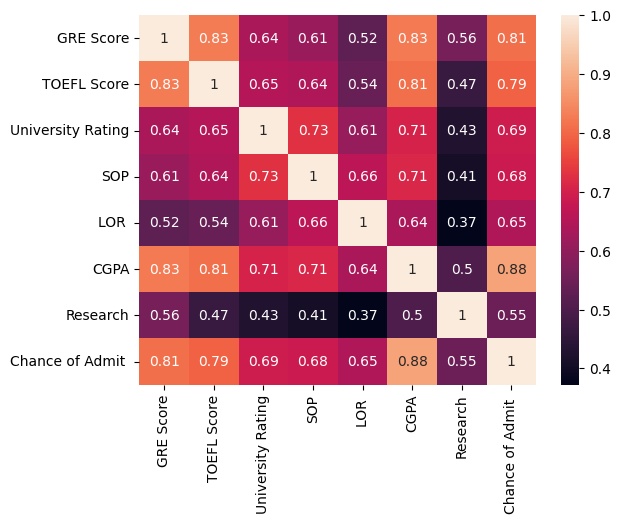

In [ ]:
sns.heatmap(data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']].corr(),annot=True)
plt.show()

Observation

in heatmap we can see that gre score vs chance of admit ,CGpa vs chance af admit are mostly correlated

In [ ]:
#to check any null value is present
data.isna().sum(axis=0)

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
per_75=np.percentile(data['Chance of Admit '],75)
per_25=np.percentile(data['Chance of Admit '],25)


In [ ]:
per_25

np.float64(0.63)

In [ ]:
per_75

np.float64(0.82)

In [ ]:
iqr=per_75 - per_25
iqr

np.float64(0.18999999999999995)

In [ ]:
per_25 - (1.5 * iqr)

np.float64(0.3450000000000001)

In [ ]:
upper_limit=data[data['Chance of Admit ']>(per_75 + (1.5 * iqr) )]
upper_limit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
lower_limit=data[data['Chance of Admit ']<(per_25 - (1.5 * iqr) )]
lower_limit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


observation

two outliers present based on iqr method

<Axes: ylabel='Chance of Admit '>

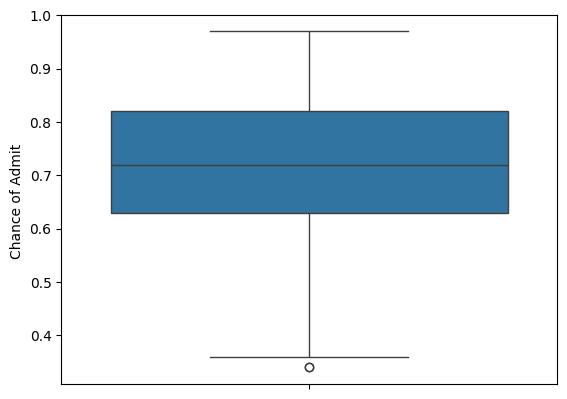

In [ ]:
sns.boxplot(data=data,y='Chance of Admit ')

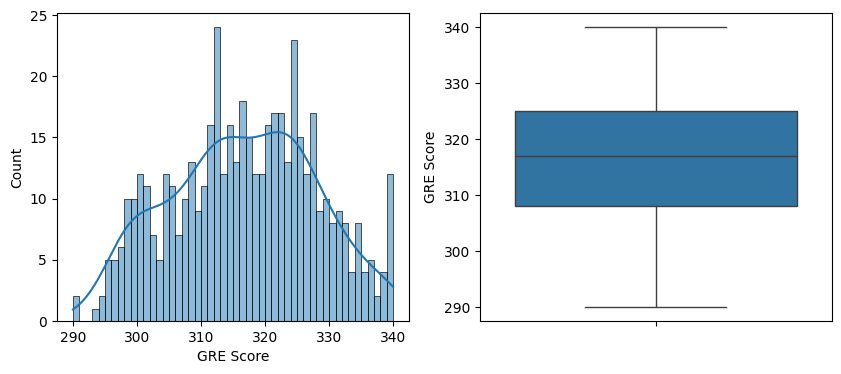

In [ ]:
fig ,axes=plt.subplots(1,2,figsize=(10,4))

sns.histplot(data=data,x='GRE Score',kde=True,bins=50,ax=axes[0])
sns.boxplot(data=data,y='GRE Score',ax=axes[1])
plt.show()

In [ ]:
X=data.drop(columns='Chance of Admit ')
Y=data['Chance of Admit ']

# preprocessing

In [ ]:
#split the data into training data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
#stantardisation of the data with standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_tr_scaled=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)

In [ ]:
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

# model building by linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#train the model
l_model=LinearRegression()

In [ ]:
l_model.fit(X_tr_scaled,y_train)

LinearRegression()

In [ ]:
l_model.coef_

array([0.02091007, 0.01965792, 0.00701103, 0.00304937, 0.01352815,
       0.07069295, 0.00988992])

# coefficients of different features after train the model

In [ ]:
coef_df=pd.DataFrame({'Features':x_train.columns,'Coefficient':l_model.coef_})
coef_df

,Features,Coefficient
0,GRE Score,0.020910
1,TOEFL Score,0.019658
2,University Rating,0.007011
3,SOP,0.003049
4,LOR,0.013528
5,CGPA,0.070693
6,Research,0.009890


# Observation

cgpa has more weightage to get the admission in foreign university.every student should focus more on their cgpa

# Lasso and Ridge regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Transform the features into polynomial features
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
lasso_predictions_train = lasso_model.predict(X_train_poly_scaled)
lasso_predictions = lasso_model.predict(X_test_poly_scaled)


print('train MSE for L1:', mean_squared_error(y_train, lasso_predictions_train))
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print("R^2 for lasso:",lasso_model.score(X_train_poly_scaled,y_train))
print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))

train MSE for L1: 0.0035247246545887707
test MSE for L1: 0.0034402229293680766
R^2 for lasso: 0.8239388985493201
R^2 for lasso: 0.82185164261985


In [ ]:
lasso_model = Lasso(alpha=10)  # Alpha is the regularization strength
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
lasso_predictions_train = lasso_model.predict(X_train_poly_scaled)
lasso_predictions = lasso_model.predict(X_test_poly_scaled)


print('train MSE for L1:', mean_squared_error(y_train, lasso_predictions_train))
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print("R^2 for lasso:",lasso_model.score(X_train_poly_scaled,y_train))
print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))

train MSE for L1: 0.020019894375000003
test MSE for L1: 0.019327605625
R^2 for lasso: 0.0
R^2 for lasso: -0.000859904976438175


In [ ]:
lasso_model = Lasso(alpha=1000)  # Alpha is the regularization strength
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
lasso_predictions_train = lasso_model.predict(X_train_poly_scaled)
lasso_predictions = lasso_model.predict(X_test_poly_scaled)


print('train MSE for L1:', mean_squared_error(y_train, lasso_predictions_train))
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print("R^2 for lasso:",lasso_model.score(X_train_poly_scaled,y_train))
print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))

train MSE for L1: 0.020019894375000003
test MSE for L1: 0.019327605625
R^2 for lasso: 0.0
R^2 for lasso: -0.000859904976438175


observation

mostly during high hyperparameter ,lasso regression penalise the weights coefficients by reduce to zero so that why r2_score become zero after applying high alpha.

In [ ]:
ridge_model = Ridge(alpha=0.001)    # Alpha is the regularization strength
ridge_model.fit(X_train_poly_scaled, y_train)
ridge_predictions_train = ridge_model.predict(X_train_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)


print("*"*20)
print('train MSE for L2:', mean_squared_error(y_train, ridge_predictions_train))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

********************
train MSE for L2: 0.0029778759441031932
test MSE for L2: 0.0037015387866775984
R^2 for ridge: 0.8083196734152763


In [ ]:
ridge_model = Ridge(alpha=20)    # Alpha is the regularization strength
ridge_model.fit(X_train_poly_scaled, y_train)
ridge_predictions_train = ridge_model.predict(X_train_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)


print("*"*20)
print('train MSE for L2:', mean_squared_error(y_train, ridge_predictions_train))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

********************
train MSE for L2: 0.0034830462231252375
test MSE for L2: 0.003405850504128336
R^2 for ridge: 0.8236315828217939


In [ ]:
ridge_model = Ridge(alpha=1000)    # Alpha is the regularization strength
ridge_model.fit(X_train_poly_scaled, y_train)
ridge_predictions_train = ridge_model.predict(X_train_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)


print("*"*20)
print('train MSE for L2:', mean_squared_error(y_train, ridge_predictions_train))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

********************
train MSE for L2: 0.003982257901319849
test MSE for L2: 0.003847376566808254
R^2 for ridge: 0.8007676160318857


observation

by trying the different hyperparameter, mse for training the model and after test the model came same and r2 came same in during difffernt alpha so model is no need or ridge regression.the model is correct there is no overfit or underfit

In [ ]:
#bias of the model
l_model.intercept_

np.float64(0.7209250000000001)

In [ ]:
#r2_score of train data
l_model.score(X_tr_scaled,y_train)

0.8215099192361265

In [ ]:
#r2_score of test data
l_model.score(x_test_scaled,y_test)

0.8208741703103731

# Testing the assumptions of linear assumption

# Errors are normally distributed

In [ ]:
#predicted value by model on train data
y_pred = l_model.predict(X_tr_scaled)

In [ ]:
y_train_array=y_train.to_numpy()

In [ ]:
#
error = y_pred - y_train_array

In [ ]:
len(error[error>0.1])

29

<Axes: ylabel='Count'>

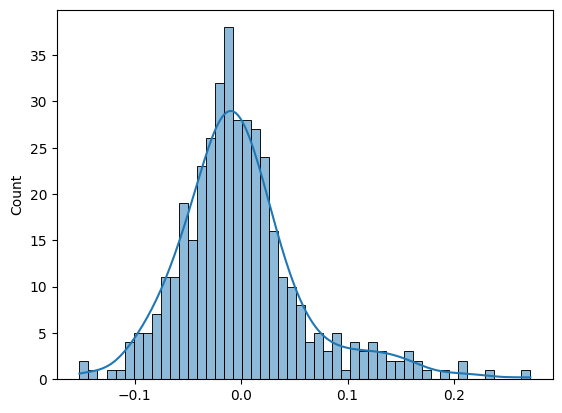

In [ ]:
sns.histplot(error,bins=50,kde=True)


In [ ]:
from statsmodels.graphics.gofplots import qqplot

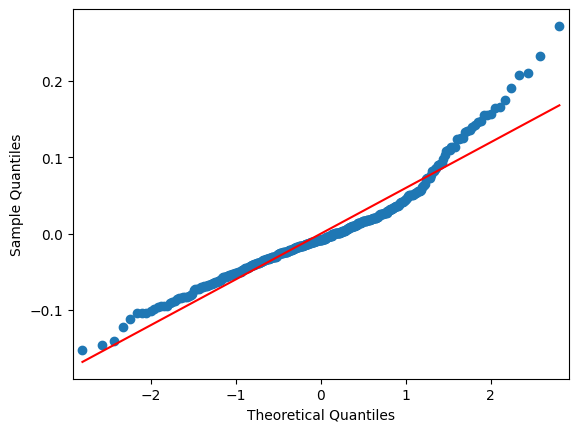

In [ ]:
qqplot(error,line='s')
plt.show()

In [ ]:
from scipy.stats import shapiro

In [ ]:
#ho=null hypothesis =gausaian distribution
#ha=alternate hypothesis=not gausian distribution

test_statistic,p_value=shapiro(error)
if p_value <0.05:
  print('reject null hypothesis')
  print('not Gausian distribution')

reject null hypothesis
not Gausian distribution


# Observation

the errors distribution is not normally distributed.it is difficult to get proper data to get normal distribution of errors in real world.may be some outliers in this errors data.but 80% it looks like normal distribution.  

# Test for Homoscedasticity

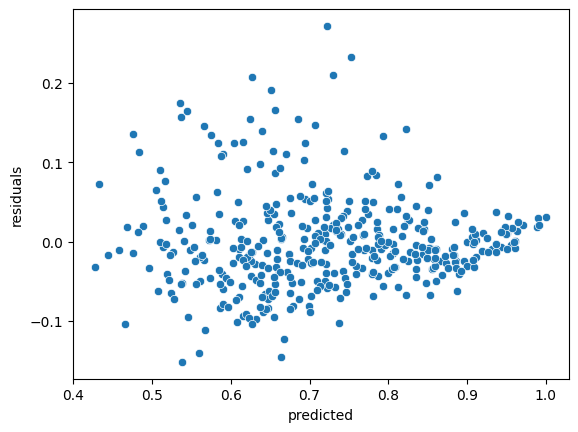

In [ ]:
sns.scatterplot(y=error,x=y_pred)
plt.ylabel("residuals")
plt.xlabel("predicted")
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
X_sm = sm.add_constant(X_tr_scaled.values)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['F statistic', 'p_value']
test = sms.het_goldfeldquandt(y_train, X_sm)
p_value=test[1]
lzip(name, test)

[('F statistic', np.float64(0.93714726996036)),
 ('p_value', np.float64(0.673326946550699))]

In [ ]:
if p_value < 0.05:
  print ('reject null hypothesis')
  print ('heteroscedasticity is present')
else :
  print ('fail to reject null hypothesis')
  print ('no heteroscadasticity')

fail to reject null hypothesis
no heteroscadasticity


Observation

visually it looks like funnel type shape present in plot.it means no same variance all around which is important to get assumptions right and to get the best fit line for linear regression .but in test we get no heteroscadesticity.may be due to real world data it shows like this

#  mean of residuals is nearly zero

In [ ]:
mean_of_residuals=np.mean(error)
mean_of_residuals

np.float64(4.718447854656915e-17)

In [ ]:
error.mean()

np.float64(4.718447854656915e-17)

# Multicollinearity check by VIF

In [ ]:
import statsmodels.api as sm

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 0
feats_removed = []
cols2=x_train.columns
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=x_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, j) for j in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

  X2 = pd.DataFrame(X_tr_scaled, columns=x_train.columns)[cols2]
  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()

  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break

  feats_removed.append(vif.iloc[0]['Features'])
  i += 1
  cols2 = vif["Features"][1:].values


            Features   VIF
0          GRE Score  4.88
5               CGPA  4.75
1        TOEFL Score  4.26
3                SOP  2.92
2  University Rating  2.80
4               LOR   2.08
6           Research  1.51
Reached threshold
Highest vif: Features    GRE Score
VIF              4.88
Name: 0, dtype: object
Current adj.R2 0.8183225963653431
Features removed: 0
List of features removed: []


Observation

vif of all the features is less than 5 and adjusted r2_score is also less than 0.85 for all the features.so no multicollinearity present .this assumption is validated

# residuals histogram with OLS method

In [ ]:
X_tr_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.537360,-0.519491,-0.054636,-1.337783,0.009331,-0.326582,-1.111142
1,0.163640,0.449257,-1.802983,-0.845045,0.009331,-0.045935,0.899975
2,-1.413610,-1.003865,-0.054636,0.140430,-1.057098,-1.135504,-1.111142
3,-1.413610,-1.326781,-1.802983,-0.352308,-1.590312,-2.918435,0.899975
4,0.514140,-0.519491,-0.054636,0.140430,0.542546,0.449323,0.899975
...,...,...,...,...,...,...,...
395,-0.800235,0.449257,0.819538,0.633168,1.075760,-0.326582,-1.111142
396,0.426515,0.610715,1.693711,1.618644,1.608974,1.456349,0.899975
397,0.777014,-0.035117,-0.054636,-0.352308,0.009331,0.895056,0.899975
398,0.864639,0.610715,1.693711,1.125906,0.542546,1.093159,0.899975


In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = y_pred - y_train

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

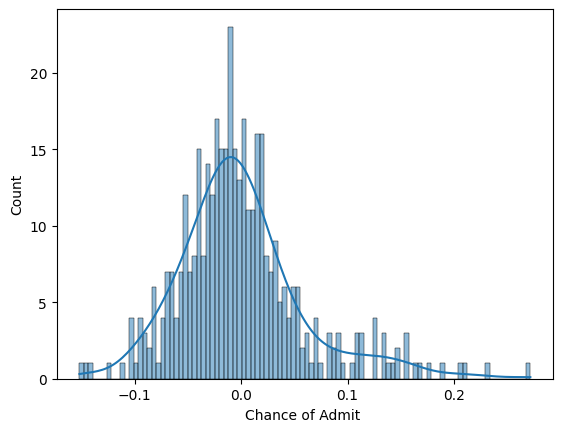

In [ ]:
sns.histplot(data=errors,kde=True,bins=100)

# Linearity of variables

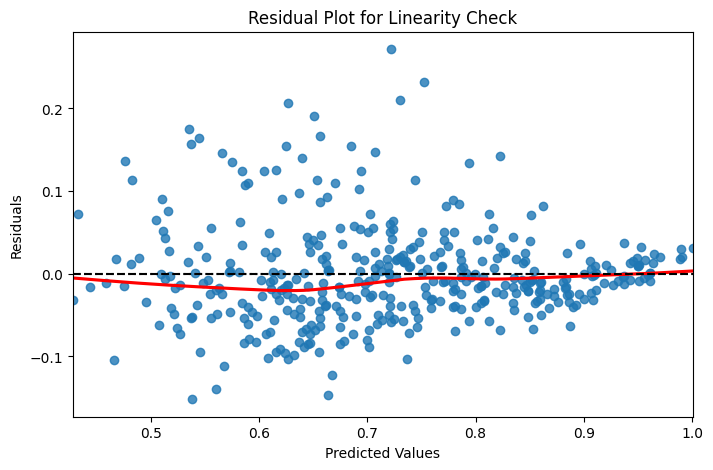

In [ ]:
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=errors, lowess=True, line_kws={"color": "red"})
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linearity Check")
plt.show()

# observation

we can see the plot that there is some curve in red line

red line is not completely overlap with dotted line.so data is not completely linear but in real world some curvature is always present

# metrics for evaluation the model

In [ ]:
def adjusted_r2_score(r2,m,d):
  return (1-((1-r2)*(m-1)/(m-d-1)))


In [ ]:
r2=l_model.score(X_tr_scaled,y_train)
r2

0.8215099192361265

In [ ]:
m=X_tr_scaled.shape[0]
d=X_tr_scaled.shape[1]

In [ ]:
adjusted_r2_score_train=adjusted_r2_score(r2,m,d)
f"Adjusted R-squared (Train): {adjusted_r2_score_train}"

'Adjusted R-squared (Train): 0.818322596365343'

In [ ]:
r2_test=l_model.score(x_test_scaled,y_test)
r2_test

0.8208741703103731

In [ ]:
adjusted_r2_score_test = adjusted_r2_score(r2_test, m, d)
print(f"Adjusted R-squared (Test): {adjusted_r2_score_test}")

Adjusted R-squared (Test): 0.8176754947802012


# observation

Adjusted r2_score after training the model and during test the model is approximately same and is near to 1.

0.816 value represent model has high accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [ ]:
y_pred_test=l_model.predict(x_test_scaled)

In [ ]:
y_test_array=y_test.to_numpy()

In [ ]:
#MAE after training the model
mae_train=mean_absolute_error(y_pred,y_train_array)
print(f'MAE_training:{mae_train}')


MAE_training:0.04294488315548092


In [ ]:
mae_test=mean_absolute_error(y_pred_test,y_test_array)
print(f'MAE_test:{mae_test}')

MAE_test:0.040200193804157944


Observation

mean absolute error after training the model and during test the model is very less and nearly same .it means model have high accuracy



In [ ]:
rmse_train=np.sqrt(mean_squared_error(y_pred,y_train_array))
print(f'RMSE_training:{rmse_train}')

RMSE_training:0.05977752557506849


In [ ]:
rmse_test=np.sqrt(mean_squared_error(y_pred_test,y_test_array))
print(f'RMSE_test:{rmse_test}')

RMSE_test:0.0588141045765077


Observations

root mean square error generally penalised the high error values but 0.05 value is very less means model is very good

# Business insights


.CGPA,GRE score,TOFEL score,LOR are the more important features according to model weights coefficients

.CGPA has maximum weight coefficient in all the features.students should focus more on the cgpa to increase the chance to get admission in foreign colleges.

.Some important metrics to test the model like adjusted_r2_score has 0.82 value which is near to perfect model value(adjusted _r2_score =1)

Mean squared error is also very less which is good for model.means actual value is near to predicted value

Root mean squared error is also very less which means very less outliers or predicted errors

# Recommendation

.company should select those students which have high CGPA  so chance of admission to foreign coountries increased because CGPA has maximum weight coefficient

company should focus on high GRE score,TOFEL score,LOR students these features also has high weight coefficient

company should advise the students to get high CGPA during college .

